In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import pulsar stars dataset
data = pd.read_csv('pulsar_stars.csv')
data.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


###### Dataframe info

This is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

In [3]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (17898, 9) 

Data columns: 
 Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=17898, step=1) 

Data values: 
 [[140.5625      55.68378214  -0.23457141 ...   7.97553179  74.24222492
    0.        ]
 [102.5078125   58.88243001   0.46531815 ...  10.57648674 127.3935796
    0.        ]
 [103.015625    39.34164944   0.32332837 ...   7.73582202  63.17190911
    0.        ]
 ...
 [119.3359375   59.93593941   0.1593631  ...   2.49951714   4.59517265
    0.        ]
 [114.5078125   53.90239966   0.20116138 ...  10.00796731 134.2389095
    0.        ]
 [ 57.0625      85.79734025   1.40639105 ...

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


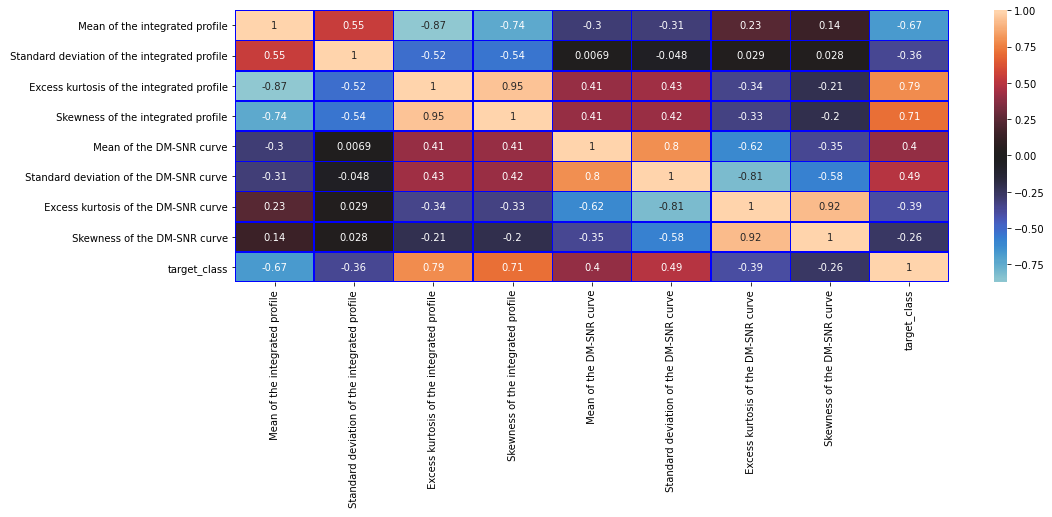

In [4]:
# Correlation matrix
corr_matrix_origin = (data.loc[:, data.columns]).corr(method ='pearson')
list_col_origin = list(data.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see the target class is well correlated with features and also we can see that Mean of the DM-SNR curve is highly correlated with it's standard deviation which is not supprizing. Also, there are high correlation between some other variables and we can't tell that there are linear dependence.

#### Data visualisation

In [5]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()


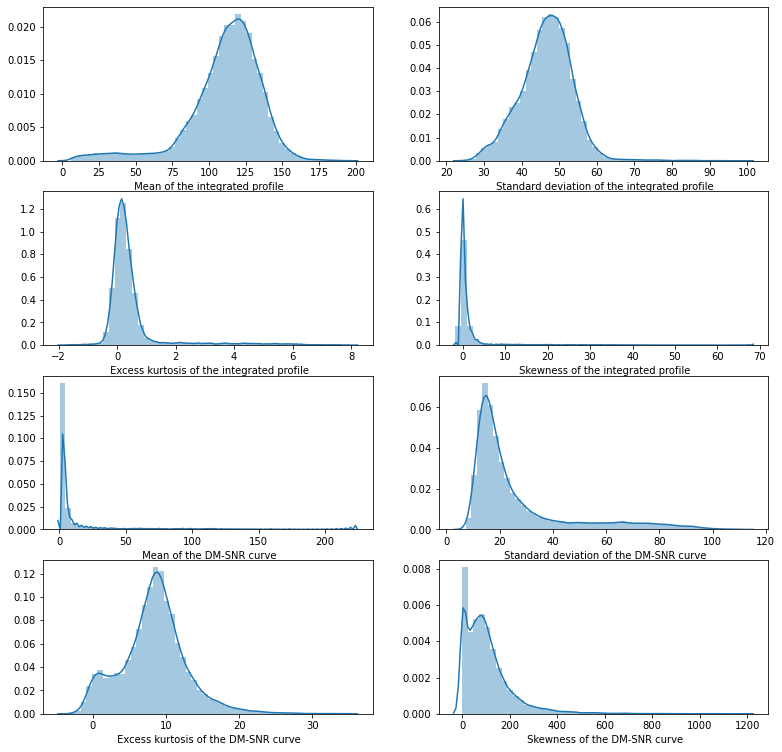

In [6]:
# Let see the distribution of each continual feature in dataset
sub_hist(data = data.drop('target_class', axis = 1), m=13, n=13, num_col = 2)

In [7]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

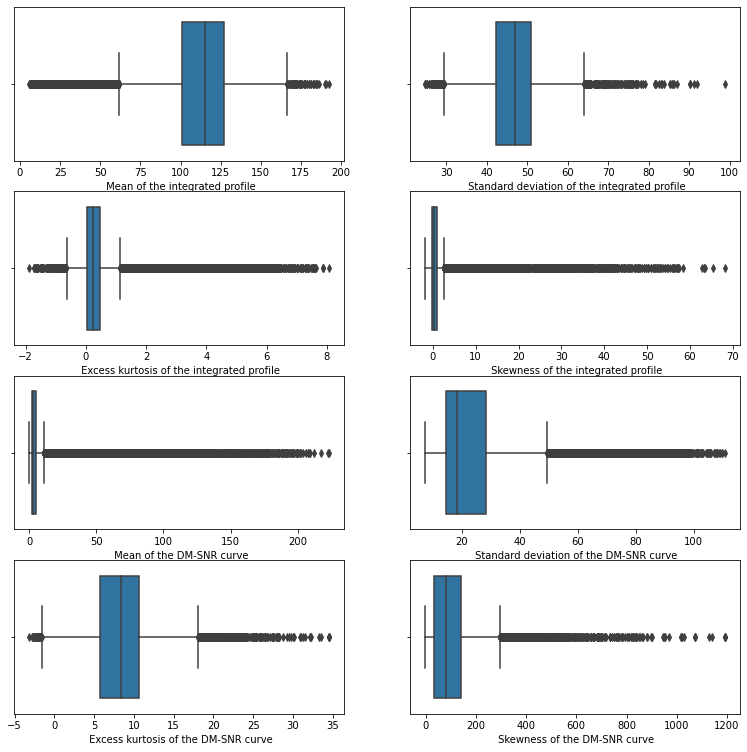

In [8]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data = data.drop('target_class', axis = 1),m=13,n=13, num_col = 2)

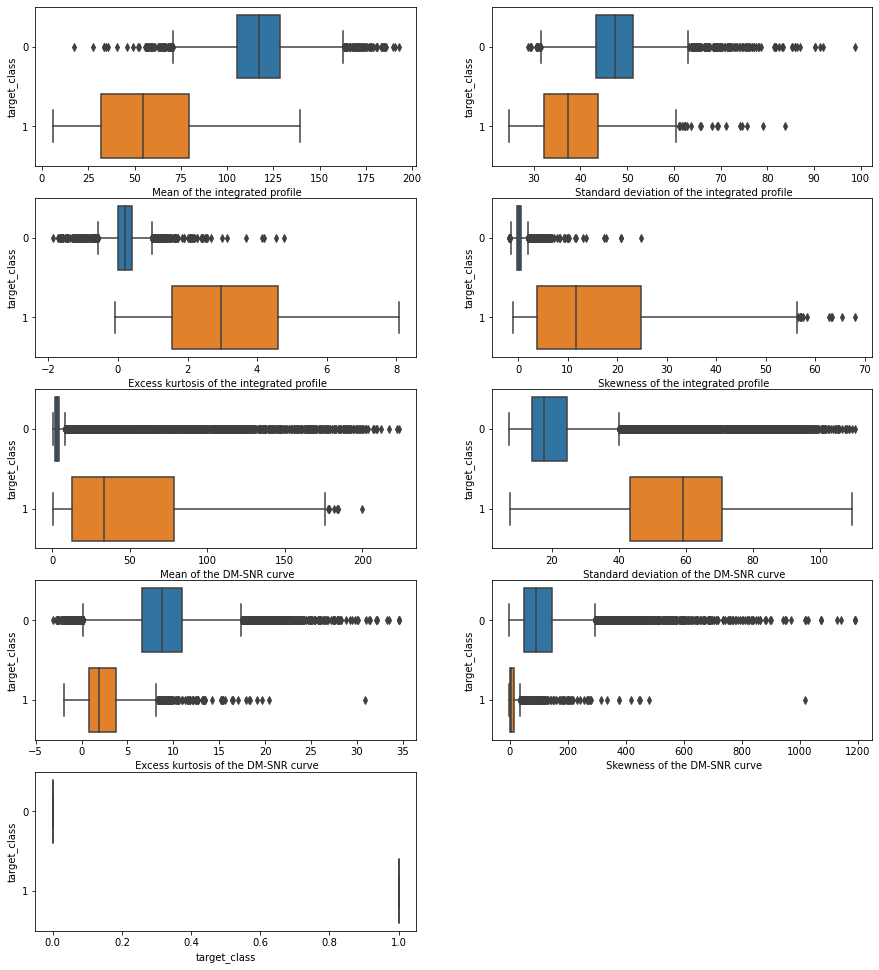

In [11]:
sub_boxplot(data = data, y = 'target_class',n=17,m=15, orient ='h', num_col = 2)

In [12]:
# Let create function for ploting distribution of descrete variables
def sub_countplot(data, m=15, n=25, hue = None, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.countplot(x = data_descrete.iloc[:,j], ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.countplot(data[data.columns[2*i+j]], hue=hue, ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()

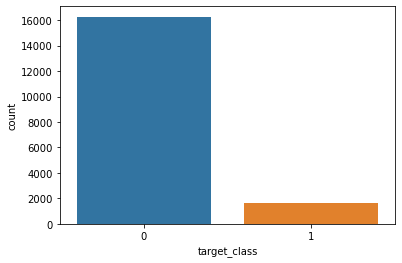

In [14]:
# Let see the distribution of target variable
sns.countplot(x= data.iloc[:,8])

In [21]:
data[data.target_class == 1].count()

 Mean of the integrated profile                  1639
 Standard deviation of the integrated profile    1639
 Excess kurtosis of the integrated profile       1639
 Skewness of the integrated profile              1639
 Mean of the DM-SNR curve                        1639
 Standard deviation of the DM-SNR curve          1639
 Excess kurtosis of the DM-SNR curve             1639
 Skewness of the DM-SNR curve                    1639
target_class                                     1639
dtype: int64

#### Dealing with missing data

In [22]:
# Missing values in whole dataset
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

#### Split dataset on train and test

In [25]:
X = data.drop('target_class', axis = 1)
y = data.target_class
display(X.head(2))
print(y)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580


0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64


In [24]:
X

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [26]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12528, 8)
y_train shape: (12528,)
X_test shape: (5370, 8)
y_test shape: (5370,)


In [34]:
print(f" Number of zeros samples: {y_test[y_test.iloc[:] == 0].count()}")
print(f" Number of ones samples: {y_test[y_test.iloc[:] == 1].count()}")

 Number of zeros samples: 4926
 Number of ones samples: 444


#### Balance dataset

Since our dataset is imbalanced then we need to use one of tehnique to balance our dataset. We will oversample the minor target class using imblearn.over_sampling.SMOTE

In [35]:
import sklearn
from imblearn.over_sampling import SMOTE

# Let oversample minor target class
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
print(f" Oversampled train set shape: {X_train_sm.shape}\n")

 Oversampled train set shape: (22666, 8)



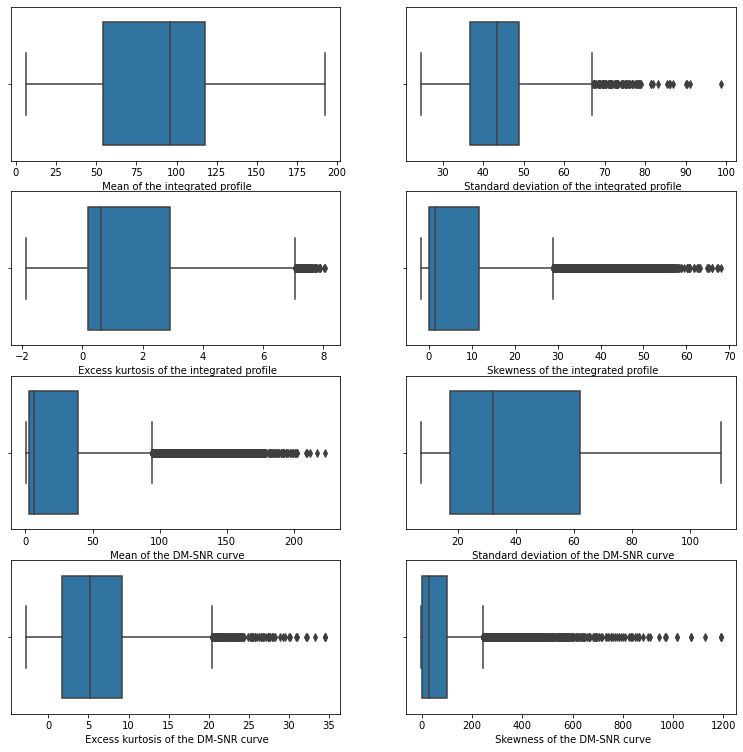

In [37]:
# Let see the distribution
sub_boxplot(data = X_train_sm,m=13,n=13, num_col = 2)

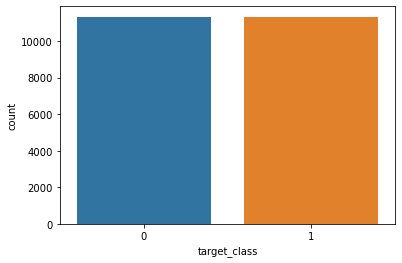

In [38]:
# Distribution of target variable
sns.countplot(y_train_sm)

#### Bringing features onto the same scale¶

In [39]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_sm_norm = norm.fit_transform(X_train_sm)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [40]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_sm_std = stdsc.fit_transform(X_train_sm)
X_test_std = stdsc.transform(X_test)

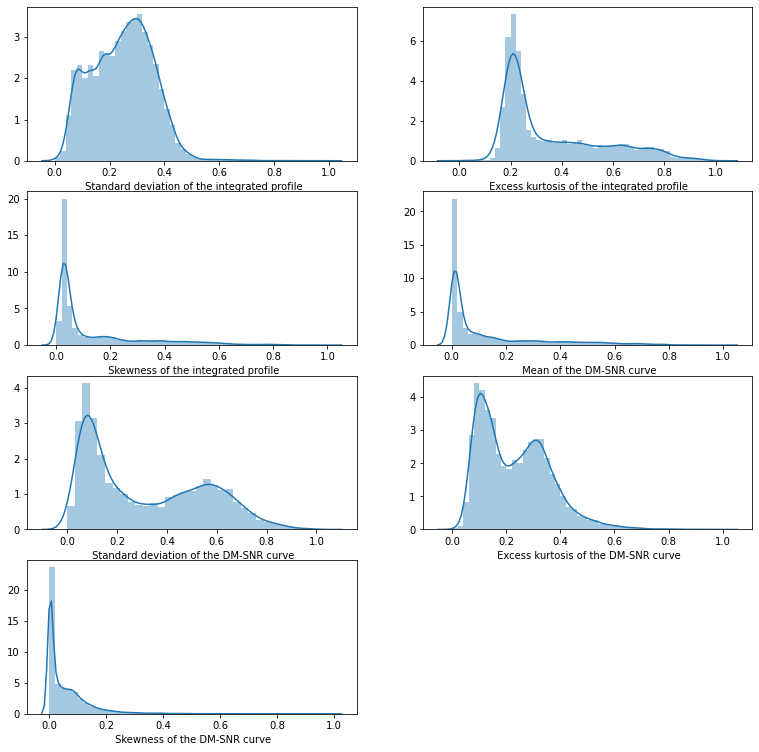

In [41]:
# Distribution of normalized data train data
col_names = list(data.columns)
col_names.remove('target_class')
df_norm = pd.DataFrame(data = X_train_sm_norm, columns = col_names)
sub_hist(df_norm.iloc[:, 1:],m=13,n=13, num_col = 2)

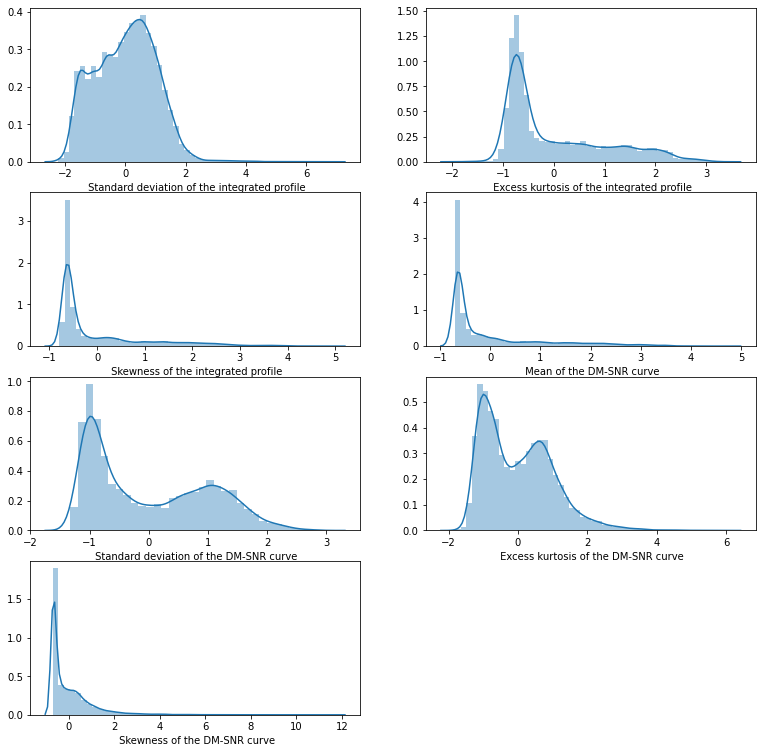

In [42]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_sm_std, columns = col_names)
sub_hist(df_std.iloc[:, 1:],m=13,n=13, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [43]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
acc_scores_sm_std = {}

In [44]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores

In [45]:
# First model SVC kernel linear
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
svc_linear = SVC(kernel='linear', C=1)
model_1 = train_model(svc_linear, X_train_sm_std, y_train_sm, X_test_std, y_test, 'svc_linear', acc_scores_sm_std)

Cross_val_scores: [0.94353772 0.94440768 0.95234944 0.94286345 0.94176042] 
 
Cross_val_scores_mean: 0.944983739787556 
 
Cross_val_scores_std: 0.0037831667147527437 

Acc_score of svc_linear: 0.9728119180633147


In [46]:
# Second model SVC_rbf
SVC_rbf = SVC()
model_2 = train_model(SVC_rbf, X_train_sm_std, y_train_sm, X_test_std, y_test, 'SVC_rbf', acc_scores_sm_std)

Cross_val_scores: [0.94838994 0.94617251 0.95345246 0.94617251 0.94926098] 
 
Cross_val_scores_mean: 0.9486896805672774 
 
Cross_val_scores_std: 0.0026747917290611428 

Acc_score of SVC_rbf: 0.974487895716946


In [47]:
# Third model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_3 = train_model(rf, X_train_sm_std, y_train_sm, X_test_std, y_test, 'ran_forest_def', acc_scores_sm_std)

Cross_val_scores: [0.97419497 0.97330686 0.97882197 0.97374807 0.97683653] 
 
Cross_val_scores_mean: 0.9753816812278258 
 
Cross_val_scores_std: 0.0021134824268178795 

Acc_score of ran_forest_def: 0.9746741154562384


In [48]:
# Fourth model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model_4 = train_model(log_reg, X_train_sm_std, y_train_sm, X_test_std, y_test, 'log_reg_def', acc_scores_sm_std)

Cross_val_scores: [0.94331716 0.94264284 0.95168762 0.94352526 0.94109861] 
 
Cross_val_scores_mean: 0.9444542988237705 
 
Cross_val_scores_std: 0.0037153524647243977 

Acc_score of log_reg_def: 0.9700186219739292


Text(0, 0.5, 'Testing Accuracy')

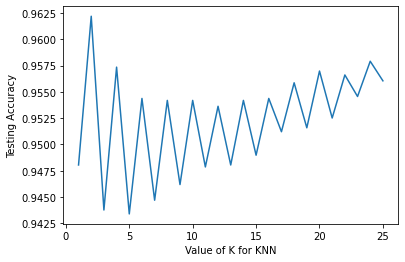

In [49]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_sm_std,y_train_sm)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [50]:
models_KNN = {}
for k in [2,4,20,24]:
    KNN = KNeighborsClassifier(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_sm_std, y_train_sm, X_test_std, y_test,acc_scores = acc_scores_sm_std, model_name ='KNN_'+str(k))

Results of KNN with 2 neighbors: 
 
Cross_val_scores: [0.97507719 0.96933598 0.97264505 0.96668873 0.970439  ] 
 
Cross_val_scores_mean: 0.9708371905054255 
 
Cross_val_scores_std: 0.0028589478459214047 

Acc_score of KNN_2: 0.9621973929236499
Results of KNN with 4 neighbors: 
 
Cross_val_scores: [0.9695633  0.96580631 0.9702184  0.96271785 0.96624752] 
 
Cross_val_scores_mean: 0.9669106744628497 
 
Cross_val_scores_std: 0.0027282470205198515 

Acc_score of KNN_4: 0.9573556797020484
Results of KNN with 20 neighbors: 
 
Cross_val_scores: [0.94905161 0.94837856 0.95830576 0.94396647 0.94948158] 
 
Cross_val_scores_mean: 0.9498367945462141 
 
Cross_val_scores_std: 0.0046701866969923594 

Acc_score of KNN_20: 0.9569832402234637
Results of KNN with 24 neighbors: 
 
Cross_val_scores: [0.94684605 0.94683433 0.95896757 0.94021619 0.94793735] 
 
Cross_val_scores_mean: 0.9481602979902028 
 
Cross_val_scores_std: 0.006057080446993882 

Acc_score of KNN_24: 0.9579143389199255


In [51]:
# 9th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_class.fit(X_train_sm_std,y_train_sm)
# Test model
y_pred = xg_class.predict(X_test_std)
acc_scores_sm_std['xgb_reg_logistic'] = accuracy_score(y_test, y_pred)

print(acc_scores_sm_std['xgb_reg_logistic'])

0.9625698324022346


In [52]:
# 10th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model_10 = train_model(sgdclass, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'sgdclass')

Cross_val_scores: [0.93692104 0.93271564 0.95014339 0.94308405 0.93999559] 
 
Cross_val_scores_mean: 0.9405719425969105 
 
Cross_val_scores_std: 0.005887377854494855 

Acc_score of sgdclass: 0.9731843575418995


In [53]:
# 11th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model_11 = train_model(Dec_tree_class, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'Dec_tree_class')

Cross_val_scores: [0.95412439 0.95632032 0.96095301 0.96117362 0.95852636] 
 
Cross_val_scores_mean: 0.9582195400664695 
 
Cross_val_scores_std: 0.002708129937467936 

Acc_score of Dec_tree_class: 0.9426443202979515


In [54]:
# 12th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model_12 = train_model(bag_class_extra_tree, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'bag_class_extra_tree')

Cross_val_scores: [0.97551831 0.97065961 0.97639532 0.97374807 0.97220384] 
 
Cross_val_scores_mean: 0.9737050289739188 
 
Cross_val_scores_std: 0.0021002702355557537 

Acc_score of bag_class_extra_tree: 0.9763500931098696


In [55]:
# Lets plot the results of models
df_results = pd.DataFrame({'models': list(acc_scores_sm_std.keys()),
                          'models_acc': list(acc_scores_sm_std.values())})
df_results

,models,models_acc
0,svc_linear,0.972812
1,SVC_rbf,0.974488
2,ran_forest_def,0.974674
3,log_reg_def,0.970019
4,KNN_2,0.962197
5,KNN_4,0.957356
6,KNN_20,0.956983
7,KNN_24,0.957914
8,xgb_reg_logistic,0.962570
9,sgdclass,0.973184


[Text(0, 0.5, 'models_acc')]

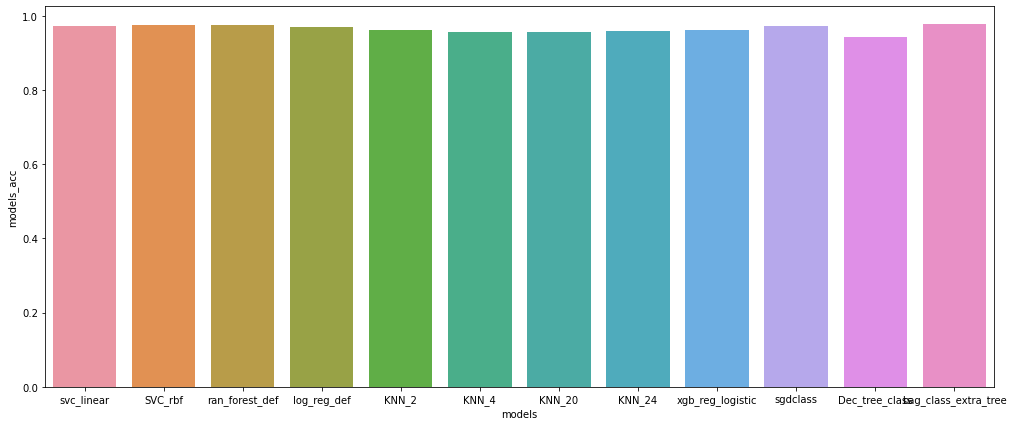

In [56]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_acc", data = df_results)
ax.set(ylabel = "models_acc")

In [57]:
# Let see which model gives the best result
print(f"The model with best acc is {max(acc_scores_sm_std, key=acc_scores_sm_std.get)} and it's acc is {acc_scores_sm_std[max(acc_scores_sm_std, key=acc_scores_sm_std.get)]:.3f}.")

The model with best acc is bag_class_extra_tree and it's acc is 0.976.


## Not sure that this is good!!!